# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 0.20
- matplotlib 3.5.2
- scipy 1.4
- hdbscan 0.8.33

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

dataset = datasets.make_moons(n_samples=1000, noise=0.05) # usar noise 0.2 para fusionar los clusters
X, _ = dataset

In [2]:
X1 = X
X2 = 2*X
X3 = 3*X


## Actividad en clase

Clusterice los datasets. Para esto haga lo siguiente:

- Dibuje las curvas k dist plots para k=4 con X1, X2 y X3. 
- Usando cada una de las curvas, escoja lo hiperparámetros de DBSCAN. 
- Corra DBSCAN para X1, X2 y X3.
- Determine el Silhouette score promedio para cada solución. 
- Corra HDBSCAN para X1, X2 y X3 usando un solo setting de hiperparámetros.
- Determine el Silhouette score promedio para cada solución. 
- Dibuje los tres dendrogramas de HDBSCAN para la solución de X3.
- ¿Qué observa al comparar ambos algoritmos de clustering DBSCAN y HDBSCAN?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***

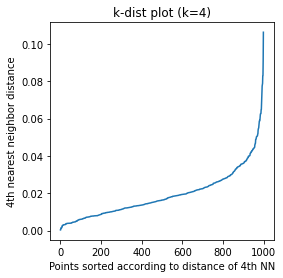

In [3]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X1)
distances, indices = neighbors_fit.kneighbors(X1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 4th NN")
plt.ylabel("4th nearest neighbor distance")
plt.title("k-dist plot (k=4)")
plt.plot(distances)
plt.show()

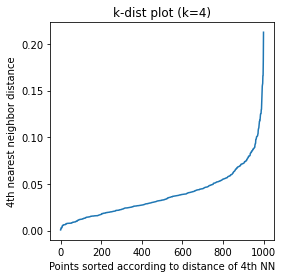

In [4]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X2)
distances, indices = neighbors_fit.kneighbors(X2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 4th NN")
plt.ylabel("4th nearest neighbor distance")
plt.title("k-dist plot (k=4)")
plt.plot(distances)
plt.show()

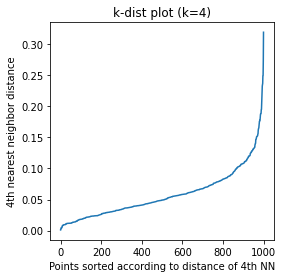

In [5]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X3)
distances, indices = neighbors_fit.kneighbors(X3)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 4th NN")
plt.ylabel("4th nearest neighbor distance")
plt.title("k-dist plot (k=4)")
plt.plot(distances)
plt.show()

In [6]:
from sklearn import cluster

dbscan = cluster.DBSCAN(eps=0.08, min_samples=5)
model1 = dbscan.fit(X1)

dbscan = cluster.DBSCAN(eps=0.16, min_samples=5)
model2 = dbscan.fit(X2)

dbscan = cluster.DBSCAN(eps=0.24, min_samples=5)
model3 = dbscan.fit(X3)

In [7]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X1, model1.labels_, metric="euclidean",))
print(silhouette_score(X2, model2.labels_, metric="euclidean",))
print(silhouette_score(X3, model3.labels_, metric="euclidean",))

0.10016639982358953
0.10016639982358953
0.10016639982358949


In [8]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X1)
cluster_labels_1 = clusterer.fit_predict(X1)

clusterer.fit(X2)
cluster_labels_2 = clusterer.fit_predict(X2)

clusterer.fit(X3)
cluster_labels_3 = clusterer.fit_predict(X3)

In [9]:
print(silhouette_score(X1, cluster_labels_1, metric="euclidean",))
print(silhouette_score(X2, cluster_labels_2, metric="euclidean",))
print(silhouette_score(X3, cluster_labels_3, metric="euclidean",))

0.3351978320606738
0.3351978320606738
0.3351978320606738


<AxesSubplot:ylabel='distance'>

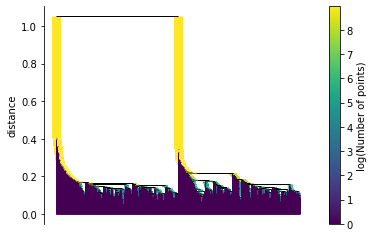

In [10]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

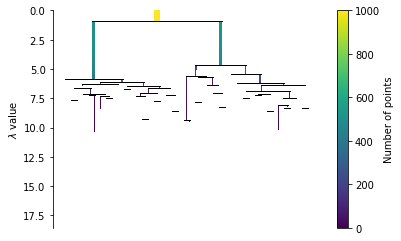

In [11]:
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

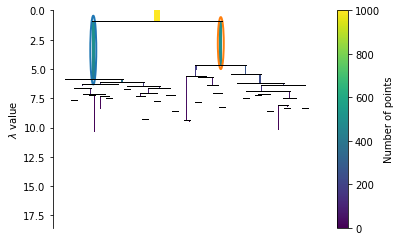

In [12]:
import seaborn as sns

clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())